## Imports

In [1]:
import torch
from PIL import Image, ImageOps
import pickle
from torchvision import models, transforms
import torch.nn as nn
import torch.optim as optim
from torch.optim import lr_scheduler
from sklearn.model_selection import train_test_split
import numpy as np
from torch.utils.data import Dataset, DataLoader
import time
import copy
import matplotlib.pyplot as plt
import os

d:\PROJEKAT_CLFO\venv\lib\site-packages\torchvision\io\image.py:11: UserWarning: Failed to load image Python extension: Could not find module 'D:\PROJEKAT_CLFO\venv\Lib\site-packages\torchvision\image.pyd' (or one of its dependencies). Try using the full path with constructor syntax.
  warn(f"Failed to load image Python extension: {e}")


## Preprocessing different types of images

In [2]:
preprocess_n= transforms.Compose([
    transforms.Resize(290),
    transforms.CenterCrop((224, 224)),
    transforms.ToTensor(),
    #transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

preprocess_i= transforms.Compose([
    transforms.Resize(224),
    transforms.CenterCrop((224, 224)),
    transforms.ToTensor(),
    #transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

## Loading paths for images with notchers

In [3]:
name_right = 'nochers_5x130_right' #enter name_right of the pickle file
with open(name_right, 'rb') as f:
    image_paths_right = pickle.load(f)

name_left = 'nochers_5x130_left' #enter name_left of the pickle file
with open(name_left, 'rb') as f:
    image_paths_left = pickle.load(f)

## Result for image transformation (notcher type)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


0 0.22095844 0.1992583 0.17945312
1 0.41402605 0.32065156 0.26833272


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


2 0.5656402 0.41753906 0.33723482
3 0.51731795 0.32177845 0.23361097
4 0.96080047 0.49190202 0.2913441
5 0.5760891 0.43120503 0.3387201


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


6 0.58494663 0.34462184 0.20144156
7 0.27790907 0.25344235 0.23601924


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


8 0.4148168 0.34504637 0.2810938
9 0.63124263 0.45493412 0.30355304


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


10 0.49112055 0.3309185 0.27638915
11 0.43835253 0.30157724 0.22375824
12 0.66218084 0.4104583 0.103671916


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


13 0.6294986 0.57627183 0.5558592
14 0.50596726 0.3037148 0.2586962


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


15 0.9247875 0.43310452 0.18907177
16 0.7700004 0.4025738 0.20728561


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


17 0.6860477 0.2638205 0.11272817
18 0.35976738 0.18439515 0.08505072


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


19 0.5005414 0.32444495 0.13248198
20 0.35459772 0.2799259 0.22284792


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


21 0.40295887 0.26613373 0.12327694
22 0.5662768 0.33594146 0.13875149


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


23 0.46172237 0.35199526 0.25473168
24 0.41712233 0.30875322 0.27182743


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


25 0.78088677 0.5215645 0.28401276
26 0.5264802 0.4541822 0.42890292


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


27 0.3865955 0.26389423 0.20898165
28 0.4507564 0.31120488 0.17334111


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


29 0.5344454 0.24502394 0.174942
30 0.49238786 0.30648667 0.18476687


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


31 0.56362486 0.4107819 0.3542065
32 0.63025457 0.24062066 0.2585437
33 0.6966786 0.49183208 0.3520113
34 0.6226638 0.44300994 0.29142556


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


35 0.9278982 0.4015507 0.14430621
36 0.90142214 0.56787485 0.43355146


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


37 0.6443699 0.44534436 0.34461436
38 0.35366467 0.29040512 0.26491833


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


39 0.5299846 0.26774767 0.1613705
40 0.4844999 0.21356456 0.14892952


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


41 0.19155891 0.15001416 0.12547469
42 0.33637193 0.24349247 0.21344969
43 0.30706707 0.23981115 0.19417474
44 0.5924161 0.27755338 0.16669175


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


45 0.21038437 0.15459678 0.11712921
46 0.54138935 0.3843522 0.24326019


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


47 0.6809081 0.52901554 0.45562607
48 0.7357622 0.4770984 0.27406412


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


49 0.91347367 0.72082233 0.620563
50 0.5062607 0.44855097 0.34790963
51 0.6170989 0.3109949 0.14485785


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


52 0.532516 0.33869144 0.3223522
53 0.5174919 0.3553165 0.3005572


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


54 0.35852215 0.29083043 0.18452327
55 0.37849188 0.28324363 0.2572507
56 0.469525 0.316766 0.27045587


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


57 0.33757284 0.29299933 0.24789347
58

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


 0.80551434 0.5380963 0.37424597
59 0.37016377 0.3323241 0.300519


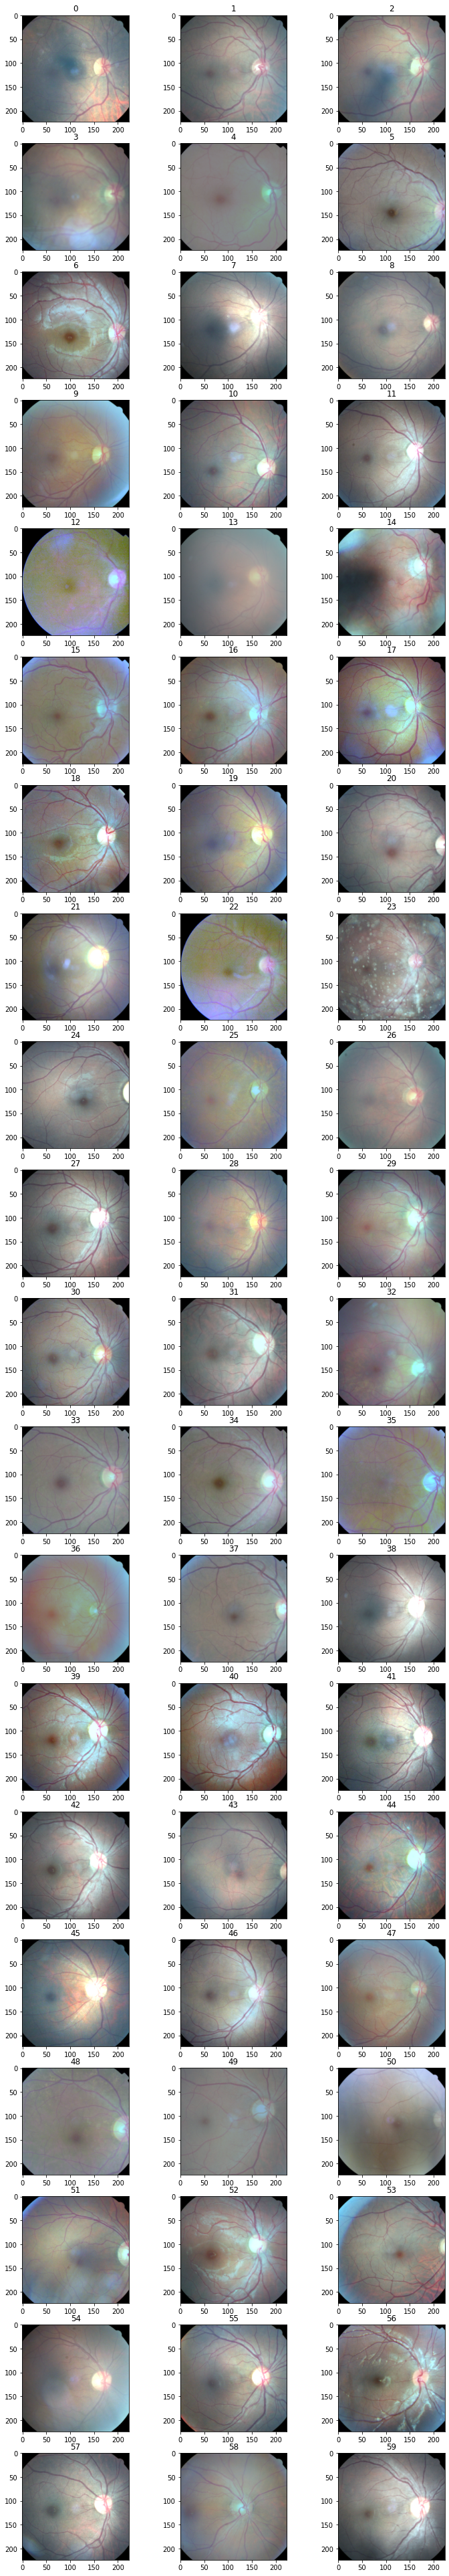

In [37]:
fig, ax = plt.subplots(20,3,figsize = (12,70))

for i in range(60):
    row, col = divmod(i,3)

    path = image_paths_right[0][i]
    input_image = Image.open(path)
    input_tensor = preprocess_n(input_image)
    image_RGB = input_tensor.permute(1, 2, 0)

    image_RGB_numpy=image_RGB.numpy()

    means_des = np.array([0.5, 0.5, 0.5])

    r, g, b = np.mean(np.mean(image_RGB_numpy, axis = 0), axis=0)

    f = means_des/np.array([r,g,b])

    image_RGB_new = f*image_RGB_numpy

    print(i,r,g,b)
    ax[row][col].imshow(image_RGB_new)
    ax[row][col].set_title(f'{i}')






## Result for image transformation (type withouth notch)

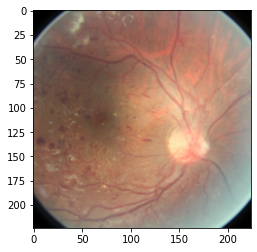

In [65]:
dir_path = 'd:\\project_data\\train_1'
img_name = '16_left.jpeg'
full_path = os.path.join(dir_path, img_name)
input_image = Image.open(full_path)
input_tensor = preprocess_i(input_image)

#input_array = np.array(input_image)
#tensor_array = np.array(input_tensor)

plt.imshow(input_tensor.permute(1, 2, 0))